### Лабораторная работа №3: "Обработка признаков (часть 2)"
#### ИУ5-21 Курганова Александра
#### Задание:
Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных.

Для выполнения следующих пунктов можно использовать несколько различных наборов данных

Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
* масштабирование признаков (не менее чем тремя способами);
* обработку выбросов для числовых признаков (по одному способу для удаления 
* выбросов и для замены выбросов);
* обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);
* отбор признаков:
** один метод из группы методов фильтрации (filter methods);
** один метод из группы методов обертывания (wrapper methods);
** один метод из группы методов вложений (embedded methods).

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = "/content/drive/My Drive/Colab Notebooks/ммо/lr3"

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
import warnings
warnings.simplefilter("ignore", UserWarning)

In [4]:
dataset = pd.read_csv(path+'/wine_dataset.csv')

In [5]:
dataset.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [6]:
filtered_columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
data = dataset[filtered_columns]
# Нужно ли масштабирование
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Масштабирование:

In [8]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [9]:
X_ALL = data.drop('quality', axis=1)

In [10]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['quality'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((5197, 11), (1300, 11))

### Масштабирование данных на основе Z-оценки

In [11]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464
...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.783214,-0.787650,-0.197054,-0.807837,-0.486252,-0.367664,-0.420128,-1.186161,0.320319,-0.210144,0.593818
6493,-0.474652,-0.119460,0.284686,0.537425,-0.257883,1.491697,0.924588,0.067824,-0.426067,-0.478971,-0.747766
6494,-0.551792,-0.605417,-0.885253,-0.891916,-0.429160,-0.029599,-0.083949,-0.719251,-1.421248,-0.478971,-0.915464
6495,-1.323198,-0.301694,-0.128234,-0.912936,-0.971538,-0.593041,-0.101642,-2.003251,0.755710,-1.016626,1.935402


In [12]:
data_cs11_scaled.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03
mean,1.007471e-15,1.002225e-15,-1.753083e-16,-1.693547e-15,3.303499e-16,1.009232e-15,-9.658103e-16,-4.708938e-15,3.086803e-15,3.102883e-16,-1.131481e-15
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00
min,-2.634589e+00,-1.577330e+00,-2.192833e+00,-1.018034e+00,-1.342639e+00,-1.663583e+00,-1.941780e+00,-2.530192e+00,-3.100615e+00,-2.091935e+00,-2.089350e+00
25%,-6.289329e-01,-6.661613e-01,-4.723335e-01,-7.657978e-01,-5.147986e-01,-7.620742e-01,-6.855323e-01,-7.859527e-01,-6.748622e-01,-6.805919e-01,-8.316152e-01
50%,-1.660892e-01,-3.016939e-01,-5.941375e-02,-5.135612e-01,-2.578826e-01,-8.594301e-02,3.990667e-02,6.448888e-02,-5.287424e-02,-1.429373e-01,-1.608231e-01
75%,3.738951e-01,3.664962e-01,4.911459e-01,5.584445e-01,2.559494e-01,5.901882e-01,7.122647e-01,7.648525e-01,6.313125e-01,4.619241e-01,6.776670e-01
max,6.699425e+00,7.534354e+00,9.231281e+00,1.268682e+01,1.584219e+01,1.456357e+01,5.737257e+00,1.476879e+01,4.923029e+00,9.870879e+00,3.696231e+00


In [13]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

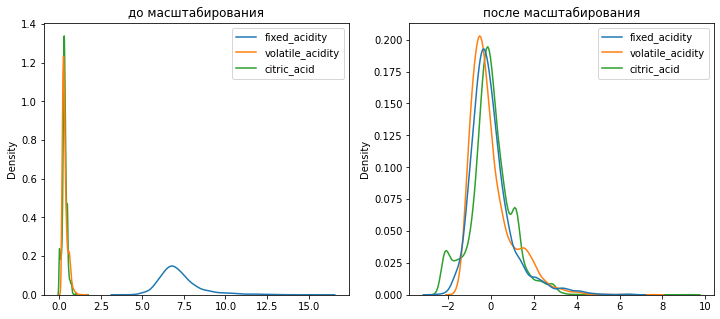

In [14]:
draw_kde(['fixed_acidity', 'volatile_acidity', 'citric_acid'], data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

In [15]:
# Обучаем StandardScaler на обучающей выборке 
# и масштабируем обучающую и тестовую выборки
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)

In [16]:
data_cs12_scaled_train.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03
mean,-6.672020e-16,-2.136277e-20,2.439842e-16,4.272553e-19,1.350554e-16,1.113641e-16,-5.937781e-17,3.950928e-14,1.533686e-16,-4.777997e-16,7.453042e-16
std,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00
min,-2.638766e+00,-1.581723e+00,-2.190155e+00,-1.018671e+00,-1.251259e+00,-1.652709e+00,-1.932370e+00,-2.536615e+00,-2.985816e+00,-2.080734e+00,-2.098828e+00
25%,-6.320046e-01,-6.713432e-01,-4.679850e-01,-7.643813e-01,-5.184132e-01,-7.576001e-01,-6.779388e-01,-7.842257e-01,-6.784129e-01,-6.824787e-01,-8.379884e-01
50%,-1.689058e-01,-3.071912e-01,-5.466408e-02,-5.100911e-01,-2.647360e-01,-8.626853e-02,4.645130e-02,6.855915e-02,-5.479045e-02,-1.498099e-01,-1.655408e-01
75%,3.713760e-01,4.211128e-01,4.964304e-01,5.706422e-01,2.708049e-01,5.850630e-01,7.178372e-01,7.440985e-01,6.311942e-01,4.494425e-01,6.750187e-01
max,6.700392e+00,6.004777e+00,6.282923e+00,1.279776e+01,1.563237e+01,1.445925e+01,5.735564e+00,1.481003e+01,4.934189e+00,9.771147e+00,3.701033e+00


In [17]:
data_cs12_scaled_test.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,-0.013619,-0.028778,0.024026,0.038238,-0.050498,-0.004676,0.032996,0.002740,-0.008882,-0.040971,-0.021594
std,1.003063,0.995719,1.005002,1.039889,0.934571,0.964362,0.992696,1.014083,1.013424,0.952416,1.012480
min,-2.330033,-1.581723,-2.190155,-0.997481,-1.335818,-1.596764,-1.932370,-2.439632,-3.110540,-1.880984,-2.098828
25%,-0.632005,-0.671343,-0.467985,-0.764381,-0.546600,-0.771586,-0.629352,-0.805127,-0.678413,-0.749062,-0.837988
50%,-0.246089,-0.307191,-0.054664,-0.467709,-0.264736,-0.086269,0.072953,0.048494,-0.054790,-0.216394,-0.165541
75%,0.294193,0.337661,0.565317,0.591833,0.165106,0.592056,0.717837,0.790918,0.568832,0.449443,0.675019
max,6.468843,7.522077,9.245056,5.550492,11.488978,6.039632,3.491721,5.218711,4.934189,7.041219,2.944529


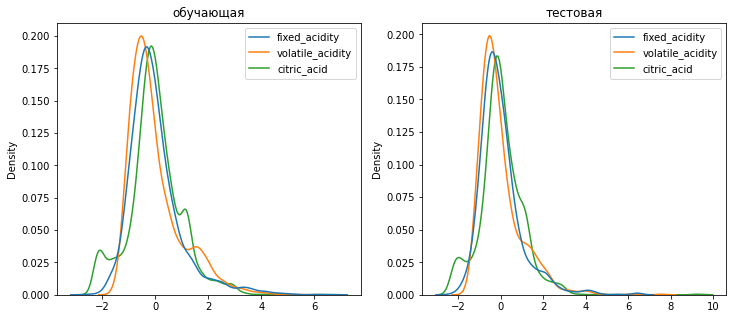

In [18]:
# распределения для обучающей и тестовой выборки немного отличаются
draw_kde(['fixed_acidity', 'volatile_acidity', 'citric_acid'], data_cs12_scaled_train, data_cs12_scaled_test, 'обучающая', 'тестовая')

### Масштабирование "Mean Normalisation"

In [19]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [20]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,-0.000292,-0.000759,0.000567,0.000554,-0.000598,-0.000058,0.000861,0.000032,-0.000224,-0.000692,-0.000745
std,0.107143,0.131709,0.118145,0.072972,0.058487,0.061630,0.130235,0.057811,0.126604,0.083599,0.172857
min,-0.282549,-0.208492,-0.258484,-0.073729,-0.079119,-0.102577,-0.252007,-0.146231,-0.392745,-0.175562,-0.361876
25%,-0.067673,-0.088492,-0.055232,-0.055324,-0.030705,-0.047021,-0.088412,-0.045402,-0.085658,-0.057584,-0.144484
50%,-0.018086,-0.040492,-0.006452,-0.036919,-0.015680,-0.005354,0.006058,0.003760,-0.006918,-0.012640,-0.028542
75%,0.039765,0.047508,0.058589,0.041302,0.014370,0.036312,0.093615,0.044245,0.079696,0.037922,0.116385
max,0.717451,0.991508,1.091109,0.926271,0.925889,0.897423,0.747993,0.853769,0.623003,0.824438,0.638124


In [21]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

In [22]:
data_cs22_scaled_train.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03
mean,1.479462e-15,-7.441159e-16,3.230203e-15,4.100049e-17,1.583982e-16,7.974321e-18,-7.119142e-18,1.713666e-13,-3.304052e-16,-1.571993e-16,-7.341144e-15
std,1.070863e-01,1.318258e-01,1.180322e-01,7.238454e-02,5.923466e-02,6.207168e-02,1.304258e-01,5.765357e-02,1.262747e-01,8.438291e-02,1.724345e-01
min,-2.825486e-01,-2.084918e-01,-2.584840e-01,-7.372897e-02,-7.411075e-02,-1.025765e-01,-2.520067e-01,-1.462309e-01,-3.769967e-01,-1.755615e-01,-3.618755e-01
25%,-6.767254e-02,-8.849182e-02,-5.523199e-02,-5.532407e-02,-3.070508e-02,-4.702098e-02,-8.841218e-02,-4.520907e-02,-8.565814e-02,-5.758400e-02,-1.444842e-01
50%,-1.808577e-02,-4.049182e-02,-6.451502e-03,-3.691916e-02,-1.568004e-02,-5.354318e-03,6.057864e-03,3.952299e-03,-6.917983e-03,-1.264018e-02,-2.854220e-02
75%,3.976547e-02,5.550818e-02,5.858915e-02,4.130170e-02,1.603950e-02,3.631235e-02,9.361547e-02,4.289581e-02,7.969619e-02,3.792162e-02,1.163853e-01
max,7.174514e-01,7.915082e-01,7.415160e-01,9.262710e-01,9.258892e-01,8.974235e-01,7.479933e-01,8.537691e-01,6.230033e-01,8.244385e-01,6.381245e-01


In [23]:
data_cs22_scaled_test.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,-0.001458,-0.003793,0.002836,0.002768,-0.002991,-0.000290,0.004303,0.000158,-0.001121,-0.003457,-0.003723
std,0.107404,0.131249,0.118611,0.075265,0.055354,0.059854,0.129461,0.058460,0.127957,0.080360,0.174570
min,-0.249491,-0.208492,-0.258484,-0.072195,-0.079119,-0.099104,-0.252007,-0.140640,-0.392745,-0.158708,-0.361876
25%,-0.067673,-0.088492,-0.055232,-0.055324,-0.032375,-0.047889,-0.082076,-0.046414,-0.085658,-0.063202,-0.144484
50%,-0.026350,-0.040492,-0.006452,-0.033852,-0.015680,-0.005354,0.009514,0.002796,-0.006918,-0.018258,-0.028542
75%,0.031501,0.044508,0.066719,0.042835,0.009779,0.036746,0.093615,0.045595,0.071822,0.037922,0.116385
max,0.692658,0.991508,1.091109,0.401731,0.680480,0.374854,0.455367,0.300848,0.623003,0.594101,0.507690


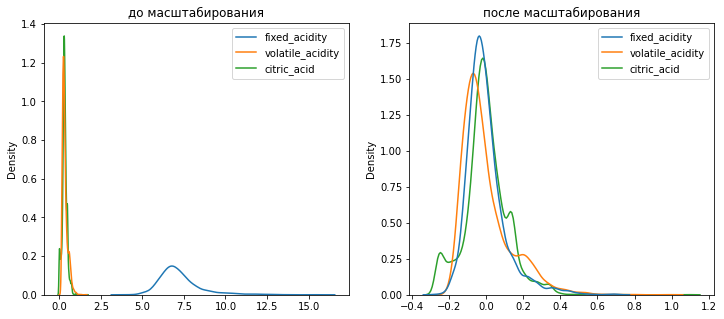

In [24]:
draw_kde(['fixed_acidity', 'volatile_acidity', 'citric_acid'], data, data_cs21_scaled, 'до масштабирования', 'после масштабирования')

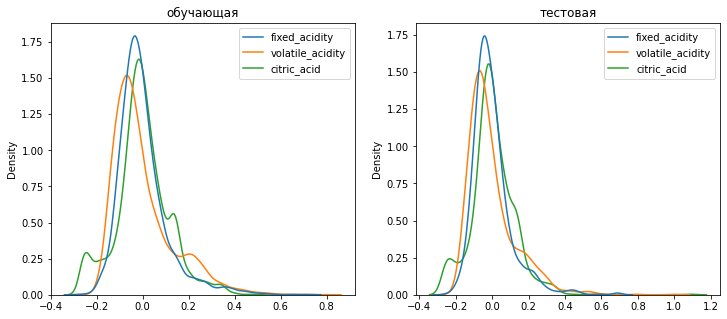

In [25]:
draw_kde(['fixed_acidity', 'volatile_acidity', 'citric_acid'], data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')

### MinMax-масштабирование

In [26]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.282257,0.173111,0.191948,0.074283,0.078129,0.102518,0.252868,0.146262,0.386435,0.174870,0.361131
std,0.107143,0.109758,0.087541,0.072972,0.058195,0.061630,0.130235,0.057811,0.124641,0.083599,0.172857
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.214876,0.100000,0.150602,0.018405,0.048173,0.055556,0.163594,0.100829,0.302326,0.117978,0.217391
50%,0.264463,0.140000,0.186747,0.036810,0.063123,0.097222,0.258065,0.149990,0.379845,0.162921,0.333333
75%,0.322314,0.213333,0.234940,0.115031,0.093023,0.138889,0.345622,0.190476,0.465116,0.213483,0.478261
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

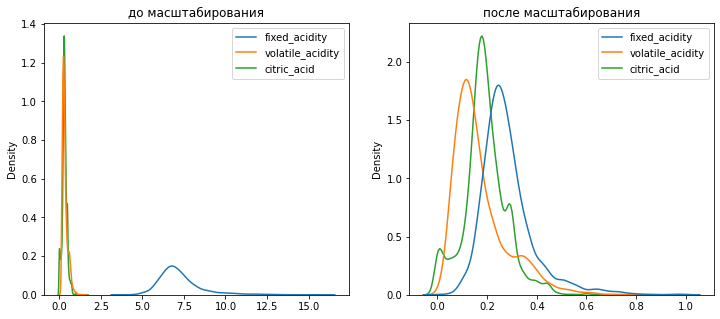

In [28]:
draw_kde(['fixed_acidity', 'volatile_acidity', 'citric_acid'], data, data_cs31_scaled, 'до масштабирования', 'после масштабирования')

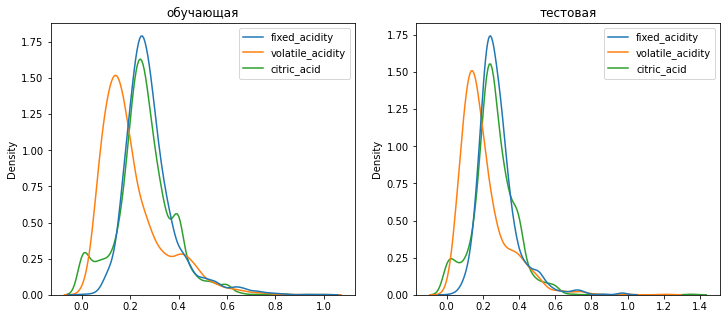

In [29]:
draw_kde(['fixed_acidity', 'volatile_acidity', 'citric_acid'], data_cs32_scaled_train, data_cs32_scaled_test, 'обучающая', 'тестовая')

### Обработка выбросов

### Удаление выбросов

In [30]:
x_col_list = ['fixed_acidity']

In [31]:
# Функция построения графиков - ящики с усами
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(15,7))
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

In [32]:
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1

In [33]:
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary

In [34]:
data.shape

(6497, 12)

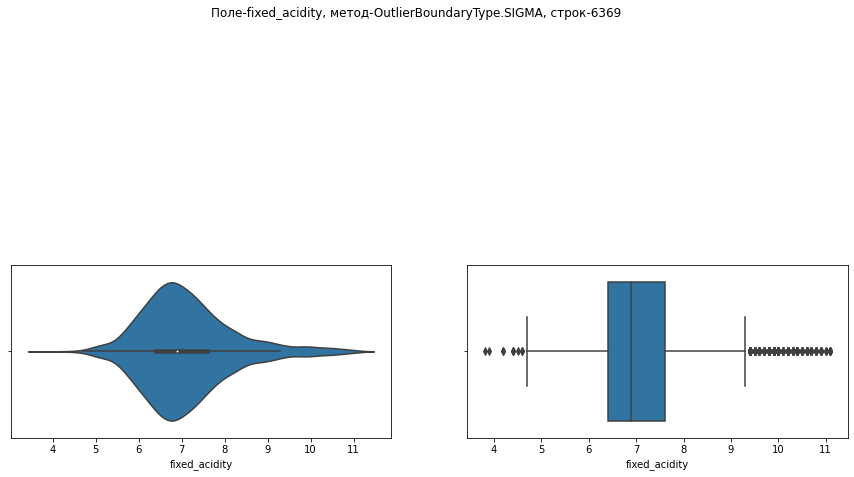

In [35]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True, 
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

### Замена выбросов

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


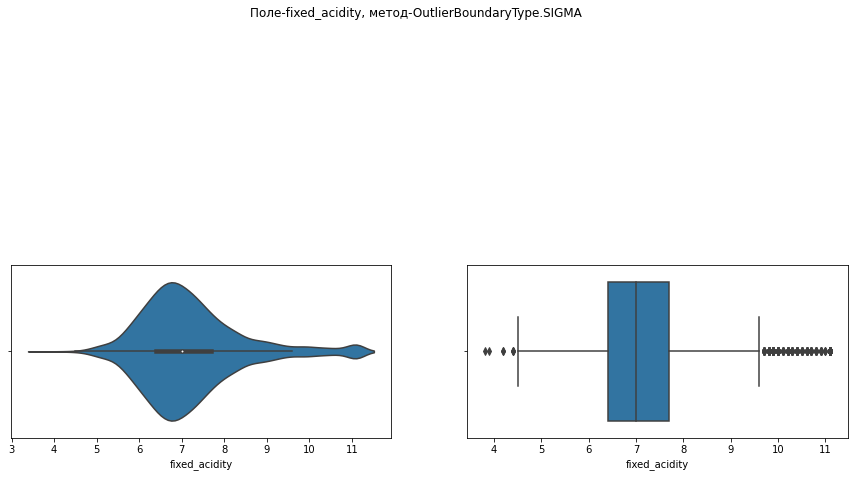

In [36]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Изменение данных
        data[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots(data, col, title)

### Обработка нестандартного признака

In [46]:
dataset2 = pd.read_csv(path+'/IOT-temp.csv', sep=",")

In [47]:
dataset2.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [48]:
dataset2.dtypes

id            object
room_id/id    object
noted_date    object
temp           int64
out/in        object
dtype: object

In [49]:
# Сконвертируем дату и время в нужный формат
dataset2['dt'] = dataset2.apply(lambda x: pd.to_datetime(x['noted_date'], format='%d-%m-%Y %H:%M'), axis=1)

In [50]:
dataset2.head()

,id,room_id/id,noted_date,temp,out/in,dt
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In,2018-12-08 09:30:00
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In,2018-12-08 09:30:00
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out,2018-12-08 09:29:00
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out,2018-12-08 09:29:00
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In,2018-12-08 09:29:00


In [51]:
dataset2.dtypes

id                    object
room_id/id            object
noted_date            object
temp                   int64
out/in                object
dt            datetime64[ns]
dtype: object

In [52]:
# День
dataset2['day'] = dataset2['dt'].dt.day
# Месяц
dataset2['month'] = dataset2['dt'].dt.month
# Год
dataset2['year'] = dataset2['dt'].dt.year
# Часы
dataset2['hour'] = dataset2['dt'].dt.hour
#Минуты
dataset2['minute'] = dataset2['dt'].dt.minute
#Неделя года
dataset2['week'] = dataset2['dt'].dt.isocalendar().week
#Квартал
dataset2['quarter'] = dataset2['dt'].dt.quarter
#День недели 
dataset2['dayofweek'] = dataset2['dt'].dt.dayofweek
#Выходной день
dataset2['day_name'] = dataset2['dt'].dt.day_name()
dataset2['is_holiday'] = dataset2.apply(lambda x: 1 if x['dt'].dayofweek in [5,6] else 0, axis=1)

In [53]:
dataset2.head()

,id,room_id/id,noted_date,temp,out/in,dt,day,month,year,hour,minute,week,quarter,dayofweek,day_name,is_holiday
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In,2018-12-08 09:30:00,8,12,2018,9,30,49,4,5,Saturday,1
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In,2018-12-08 09:30:00,8,12,2018,9,30,49,4,5,Saturday,1
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out,2018-12-08 09:29:00,8,12,2018,9,29,49,4,5,Saturday,1
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out,2018-12-08 09:29:00,8,12,2018,9,29,49,4,5,Saturday,1
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In,2018-12-08 09:29:00,8,12,2018,9,29,49,4,5,Saturday,1


In [54]:
# Разница между датами 
dataset2['now'] = datetime.datetime.today()
dataset2['diff'] = dataset2['now'] - dataset2['dt']
dataset2.dtypes

id                     object
room_id/id             object
noted_date             object
temp                    int64
out/in                 object
dt             datetime64[ns]
day                     int64
month                   int64
year                    int64
hour                    int64
minute                  int64
week                   UInt32
quarter                 int64
dayofweek               int64
day_name               object
is_holiday              int64
now            datetime64[ns]
diff          timedelta64[ns]
dtype: object

In [55]:
dataset2.head()

,id,room_id/id,noted_date,temp,out/in,dt,day,month,year,hour,minute,week,quarter,dayofweek,day_name,is_holiday,now,diff
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In,2018-12-08 09:30:00,8,12,2018,9,30,49,4,5,Saturday,1,2021-04-14 18:21:45.239533,858 days 08:51:45.239533
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In,2018-12-08 09:30:00,8,12,2018,9,30,49,4,5,Saturday,1,2021-04-14 18:21:45.239533,858 days 08:51:45.239533
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out,2018-12-08 09:29:00,8,12,2018,9,29,49,4,5,Saturday,1,2021-04-14 18:21:45.239533,858 days 08:52:45.239533
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out,2018-12-08 09:29:00,8,12,2018,9,29,49,4,5,Saturday,1,2021-04-14 18:21:45.239533,858 days 08:52:45.239533
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In,2018-12-08 09:29:00,8,12,2018,9,29,49,4,5,Saturday,1,2021-04-14 18:21:45.239533,858 days 08:52:45.239533


### Отбор признаков из группы методов фильтрации (корреляция признаков¶)

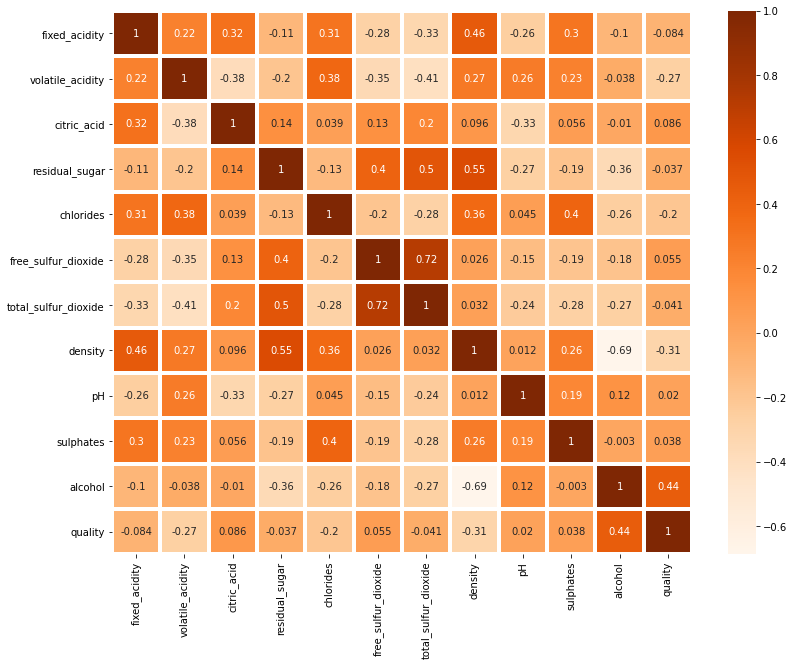

In [138]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(), cmap="Oranges", annot=True, linewidths=3)

In [139]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.6]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [140]:
make_corr_df(data)

,f1,f2,corr
0,free_sulfur_dioxide,total_sulfur_dioxide,0.720934
1,total_sulfur_dioxide,free_sulfur_dioxide,0.720934
2,alcohol,density,0.686745
3,density,alcohol,0.686745


In [141]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [142]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(data))

[['total_sulfur_dioxide', 'free_sulfur_dioxide'], ['density', 'alcohol']]

### Отбор признаков из группы методов обертывания (алгоритм полного перебора)

In [143]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

knn = KNeighborsClassifier(n_neighbors=3)

In [144]:
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(X_train, y_train, custom_feature_names=X_ALL.columns)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 550/550

Best accuracy score: 0.52
Best subset (indices): (1, 8, 9, 10)
Best subset (corresponding names): ('volatile_acidity', 'pH', 'sulphates', 'alcohol')


### Отбор признаков из группы методов вложения (логистическая регрессия)

In [145]:
from sklearn.linear_model import LogisticRegression
# Используем L1-регуляризацию
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(X_train, y_train)
# Коэффициенты регрессии
e_lr1.coef_

array([[ 6.94383322e-01,  3.18374270e+00, -1.17637148e+00,
         3.35009372e-03,  1.21101386e+01,  2.24078889e-02,
         6.74153463e-03, -1.10907226e+01,  2.70741660e+00,
        -5.66790771e+00,  4.43135359e-02],
       [-8.27887767e-02,  3.75110460e+00,  3.15366433e-01,
        -4.06124208e-02, -2.72478058e+00, -6.03005118e-02,
         8.96579063e-03,  9.70194969e-01, -2.00306301e-02,
        -3.89609133e+00, -3.01133506e-01],
       [-7.26044043e-03,  3.22778718e+00,  4.46458473e-01,
        -6.45138862e-02,  7.09705965e-01, -1.13938271e-02,
         6.17821042e-03,  4.61628965e+00, -4.41751701e-02,
        -1.37044545e+00, -9.42812425e-01],
       [ 2.04348600e-02, -2.37489634e+00, -4.43102519e-01,
         3.05368902e-02,  1.33813235e+00,  5.24738566e-03,
        -3.65234526e-03, -7.46543178e-01,  1.33442839e-01,
         5.32709994e-01,  1.25475131e-01],
       [ 1.28843031e-01, -4.03883142e+00, -5.23470732e-01,
         4.45581139e-02, -1.08191035e+01,  8.13902330e-03,
  

In [146]:
from sklearn.feature_selection import SelectFromModel
sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(X_train, y_train)
sel_e_lr1.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])